# Ebay Model training

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# EDA and feature engineering

In [154]:
# Load the dataset
df = pd.read_csv('C:/Users/jack/Documents/EbayMarketScraping/Scraping_bs4_ebay-main/02-11-23_clean_output8719row.csv')

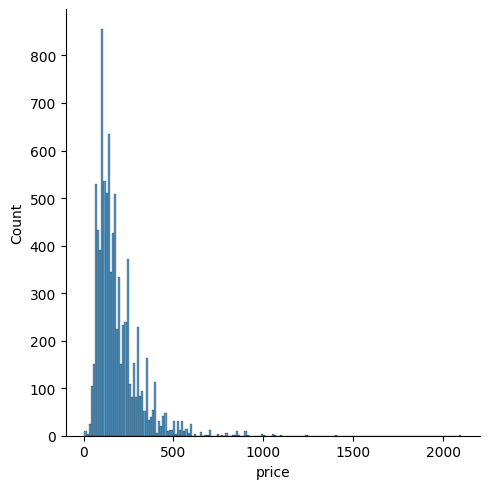

In [155]:
sns.displot(df["price"])

<Axes: xlabel='brand'>

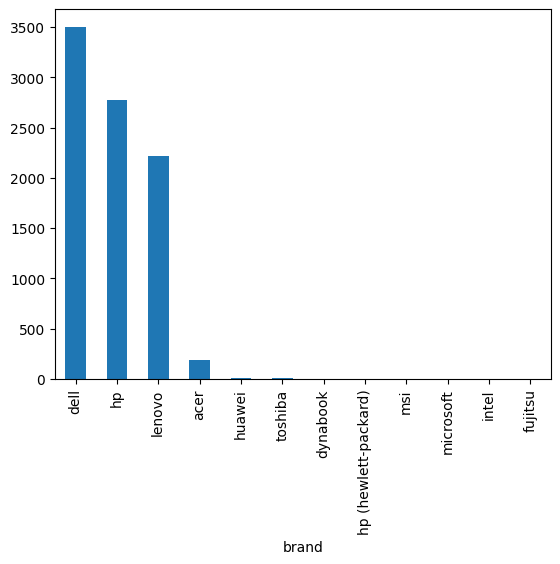

In [156]:
df["brand"].value_counts().plot(kind="bar")

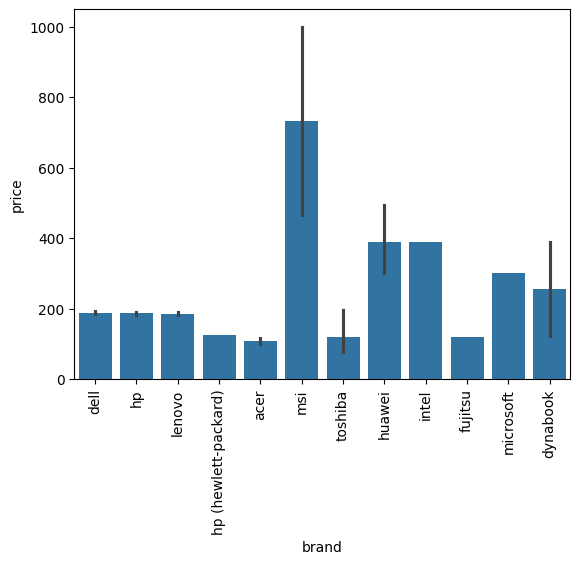

In [157]:
sns.barplot(x=df["brand"],y=df["price"])
plt.xticks(rotation="vertical")
plt.show()

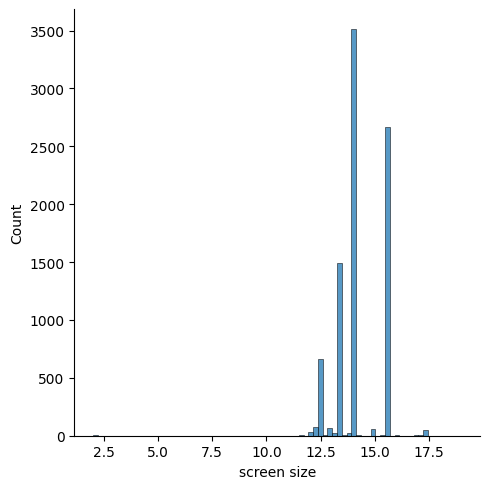

In [158]:
sns.displot(x=df["screen size"])

<Axes: xlabel='screen size', ylabel='price'>

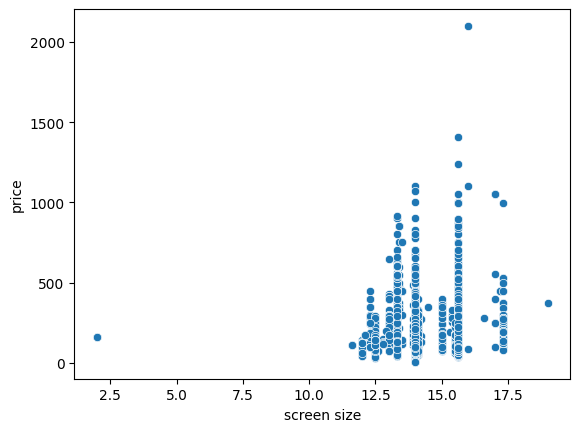

In [159]:
sns.scatterplot(x="screen size",y="price",data=df)

<Axes: xlabel='processor i series'>

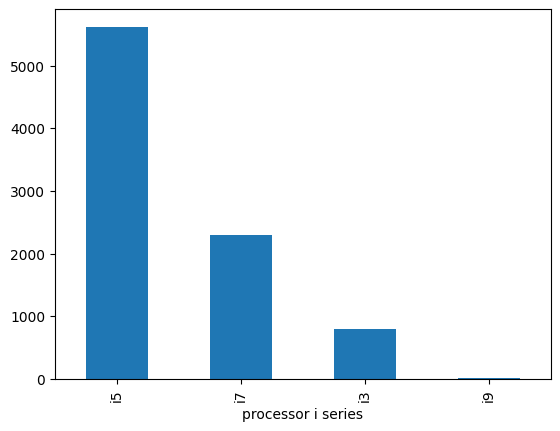

In [160]:
df['processor i series'].value_counts().plot(kind='bar')

<Axes: xlabel='processor generation'>

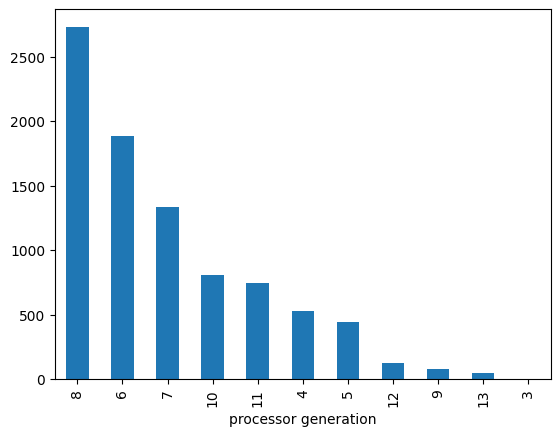

In [161]:
df['processor generation'].value_counts().plot(kind='bar')

<Axes: xlabel='processor speed'>

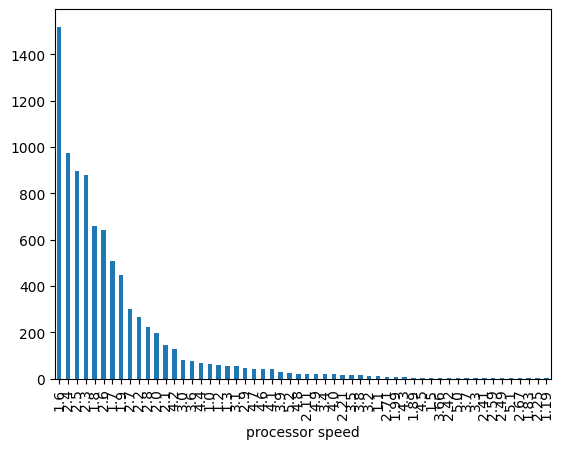

In [162]:
df['processor speed'].value_counts().plot(kind='bar')

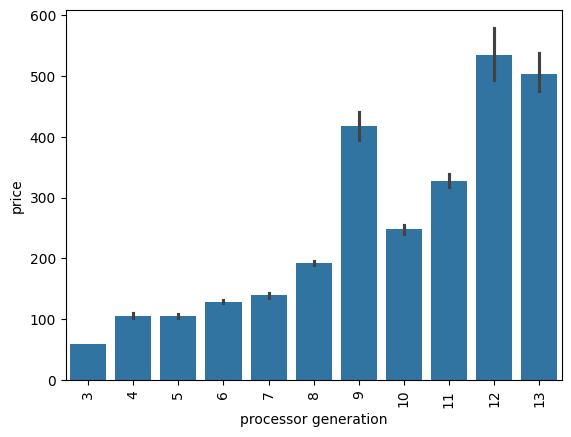

In [163]:
sns.barplot(x=df['processor generation'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

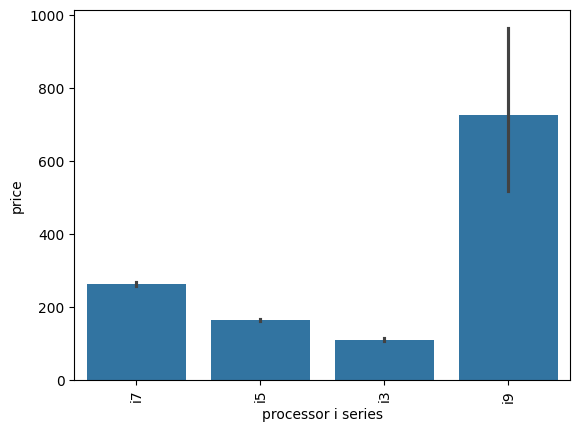

In [164]:
sns.barplot(x=df['processor i series'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

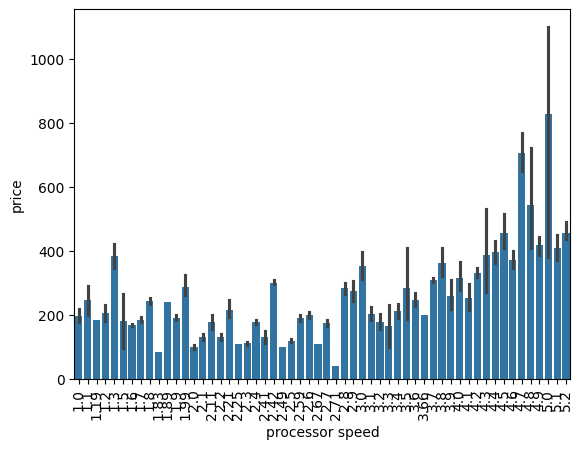

In [165]:
sns.barplot(x=df['processor speed'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='ram size'>

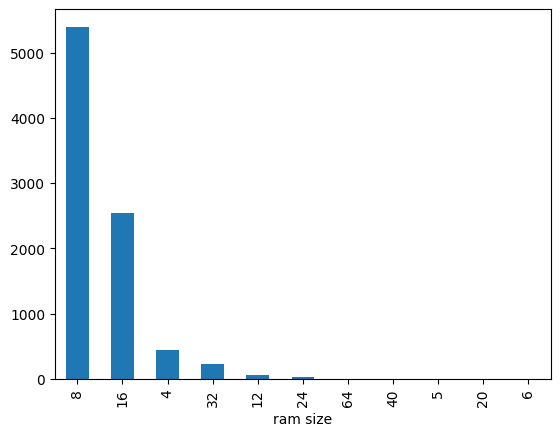

In [166]:
df['ram size'].value_counts().plot(kind='bar')

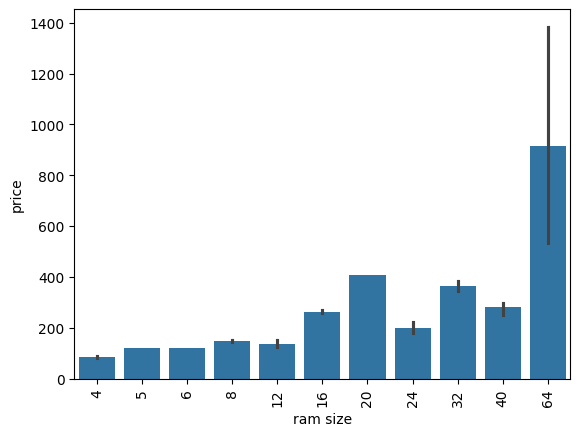

In [167]:
sns.barplot(x=df['ram size'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [168]:
df['storage capacity'].value_counts()

storage capacity
256    5196
512    1477
128     737
240     584
120     265
500     212
250     157
180      39
480      34
750       5
64        3
275       2
953       2
798       1
200       1
167       1
768       1
700       1
192       1
Name: count, dtype: int64

In [169]:
df['gpu'].value_counts()

gpu
integrated                             8060
nvidia quadro m1200                      52
nvidia quadro t1000                      43
nvidia quadro m1000m                     35
nvidia quadro p520                       33
                                       ... 
nvidia mx250 2gb                          1
nvidia® geforce rtx™ 2060 6gb gddr6       1
nvidia geforce gtx                        1
nvidia geforce gtx 1650 ti max-q          1
nvidia quadro t1000 max-q                 1
Name: count, Length: 123, dtype: int64

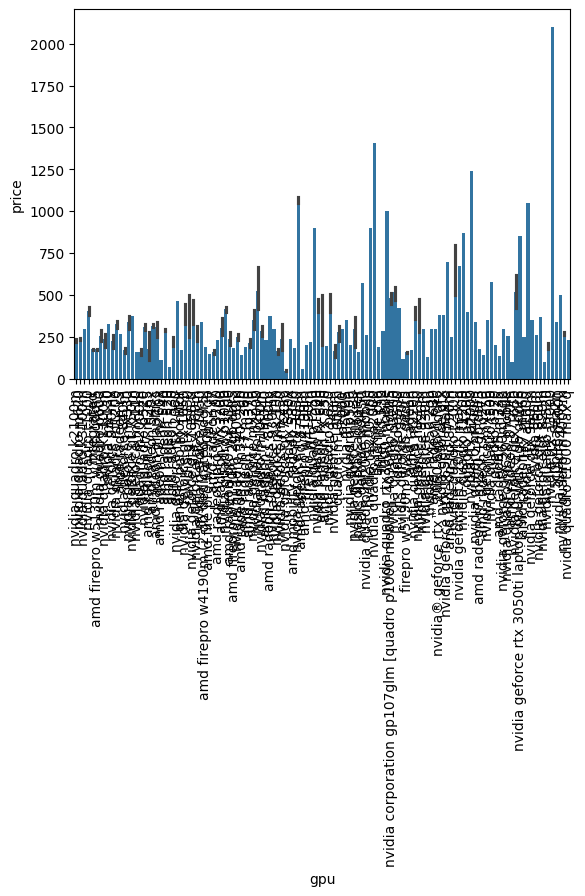

In [170]:
sns.barplot(x=df['gpu'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Figure size 2000x1000 with 0 Axes>

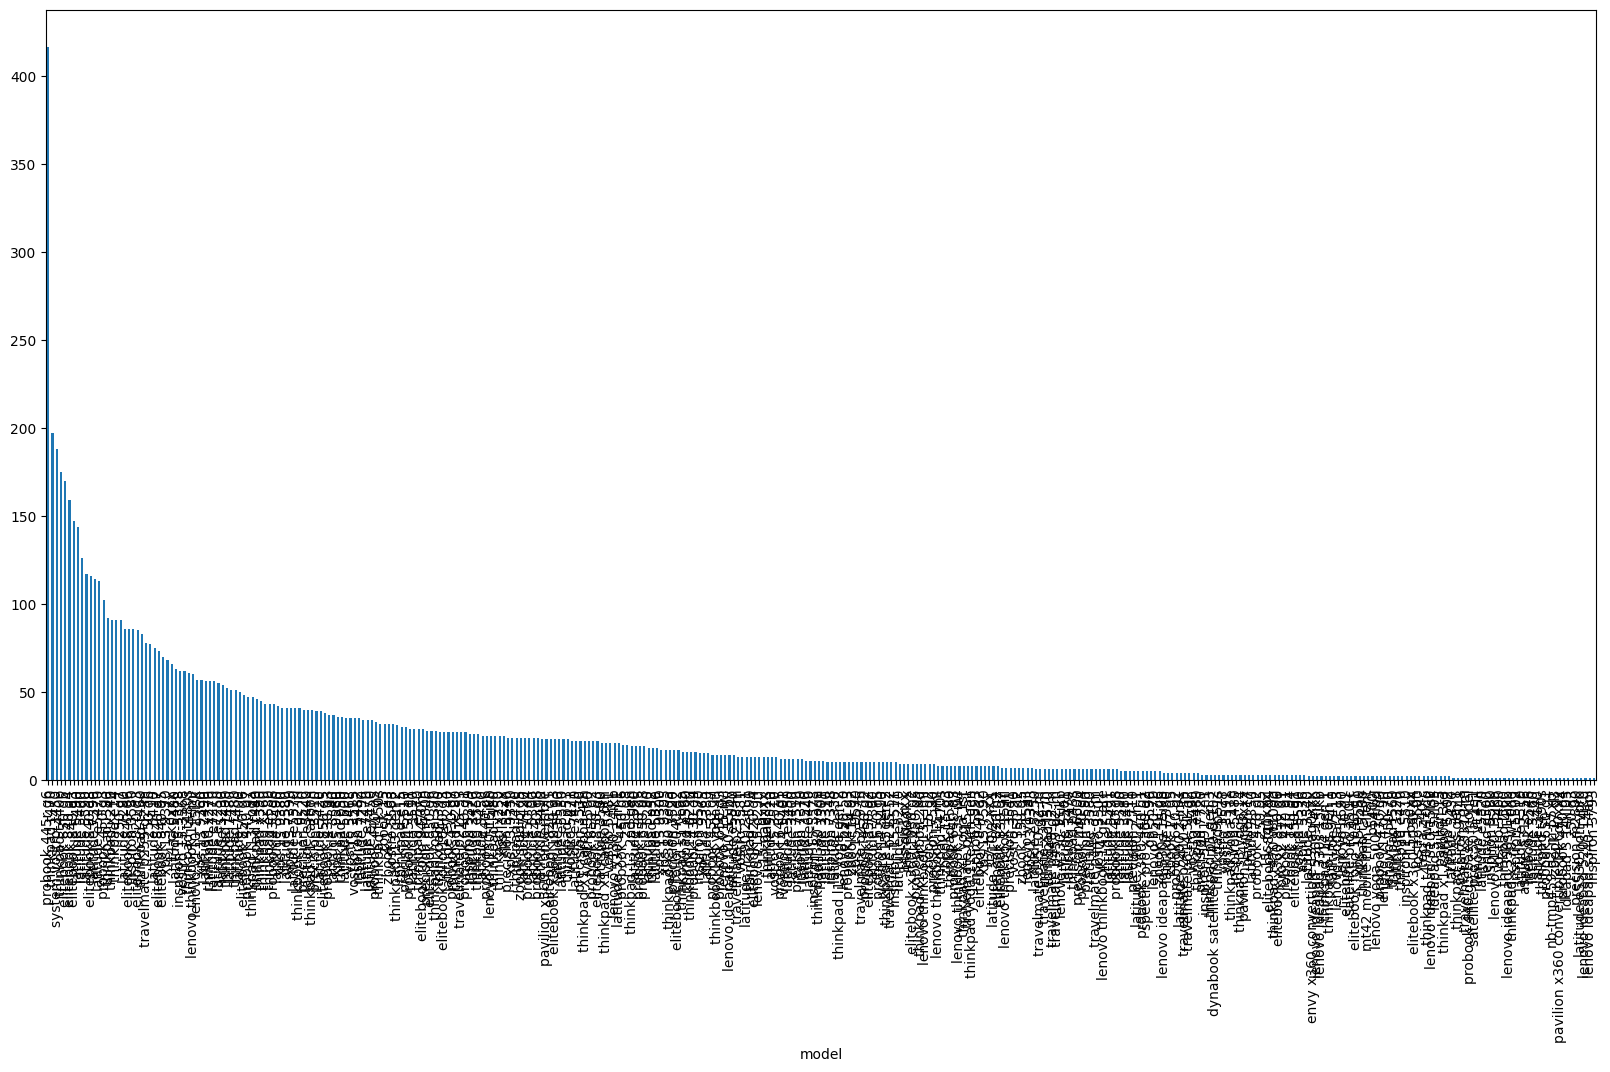

<Figure size 2000x1000 with 0 Axes>

In [171]:
df['model'].value_counts().plot(kind='bar', figsize=(20,10))

# Increase the length of the x axis to make it more readble
plt.figure(figsize=(20,10))

# Categorical label encoding

In [172]:
df = pd.read_csv('C:/Users/jack/Documents/EbayMarketScraping/Scraping_bs4_ebay-main/02-11-23_clean_output8719row.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove irrelevant columns
df.drop(['title', 'sold_date', 'link', 'seller notes', 'series', 'operating system', 'type', 'condition', 'processor', 'features', 'item number'], axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Convert categorial variables with label encoder
# Create arrary of categorial variables to be encoded
categorical_cols = ['brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']
le = LabelEncoder()

# apply label encoder on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

## Scaling Numerical Variables

In [173]:
# Scale the numerical variables
scaler = StandardScaler()
df[['price', 'processor speed', 'ram size', 'storage capacity', 'screen size']] = scaler.fit_transform(df[['price', 'processor speed', 'ram size', 'storage capacity', 'screen size']])
display(df.head())


,price,brand,processor i series,processor generation,processor speed,ram size,storage capacity,storage type,screen size,gpu,model
0,0.403432,1,2,1,0.776639,0.928846,-0.290230,5,1.218971,83,194
1,0.280141,1,2,1,0.335617,0.928846,-0.290230,5,1.218971,83,194
2,0.526724,1,2,3,0.629632,0.928846,1.879399,5,1.128821,93,182
3,0.937694,1,2,1,0.923647,0.928846,1.879399,5,2.751530,84,195
4,1.184276,1,2,6,0.482625,0.928846,-0.290230,3,1.218971,105,188


In [174]:
df.corr()['price']

price                   1.000000
brand                   0.011368
processor i series      0.403558
processor generation    0.600241
processor speed         0.316634
ram size                0.522596
storage capacity        0.485611
storage type            0.088106
screen size             0.063525
gpu                     0.276728
model                   0.067472
Name: price, dtype: float64

- `price`: The correlation of `price` with itself is always 1, so this value is not informative.

- `brand`: The correlation between `brand` and `price` is negative and very weak, which suggests that there is little or no relationship between the brand of the device and its price.

- `processor i series`: The correlation between `processor i series` and `price` is positive and moderately strong, which suggests that devices with higher-end processors tend to have higher prices.

- `processor generation`: The correlation between `processor generation` and `price` is negative and moderately strong, which suggests that newer generations of processors tend to be associated with lower prices.

- `processor speed`: The correlation between `processor speed` and `price` is positive and very weak, which suggests that there is little or no relationship between the speed of the processor and the price of the device.

- `ram size`: The correlation between `ram size` and `price` is positive and moderately strong, which suggests that devices with more RAM tend to have higher prices.

- `storage capacity`: The correlation between `storage capacity` and `price` is positive and moderately strong, which suggests that devices with more storage capacity tend to have higher prices.

- `storage type`: The correlation between `storage type` and `price` is positive and weak, which suggests that there is little or no relationship between the type of storage and the price of the device.

- `screen size`: The correlation between `screen size` and `price` is positive and very weak, which suggests that there is little or no relationship between the size of the screen and the price of the device.

- `gpu`: The correlation between `gpu` and `price` is positive and weak, which suggests that devices with better graphics processing units tend to have slightly higher prices.

- `model`: The correlation between `model` and `price` is positive and weak, which suggests that there is little or no relationship between the specific model of the device and its price.

Overall, the strongest correlations with `price` are `processor i series`, `ram size`, and `storage capacity`, which suggests that these features are important predictors of device price. The weakest correlations are `brand`, `processor speed`, `storage type`, `screen size`, and `model`, which suggests that these features are less important predictors of device price. The `gpu` feature has a positive correlation with `price`, but the correlation is weak.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8715 entries, 0 to 8718
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 8715 non-null   float64
 1   brand                 8715 non-null   int32  
 2   processor i series    8715 non-null   int32  
 3   processor generation  8715 non-null   int64  
 4   processor speed       8715 non-null   float64
 5   ram size              8715 non-null   float64
 6   storage capacity      8715 non-null   float64
 7   storage type          8715 non-null   int32  
 8   screen size           8715 non-null   float64
 9   gpu                   8715 non-null   int32  
 10  model                 8715 non-null   int32  
dtypes: float64(5), int32(5), int64(1)
memory usage: 646.8 KB


<Axes: >

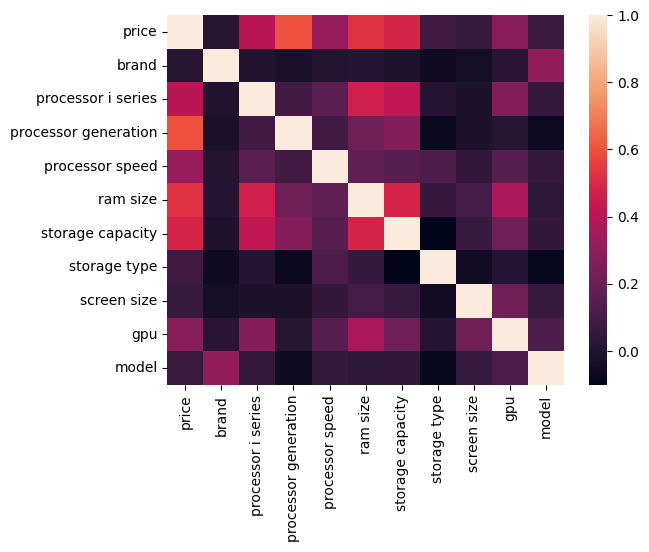

In [176]:
sns.heatmap(df.corr())

c:\Users\jack\Documents\EbayMarketScraping\Scraping_bs4_ebay-main\scraper\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jack\AppData\Local\Temp\ipykernel_4444\2721140454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


<Axes: xlabel='price', ylabel='Density'>

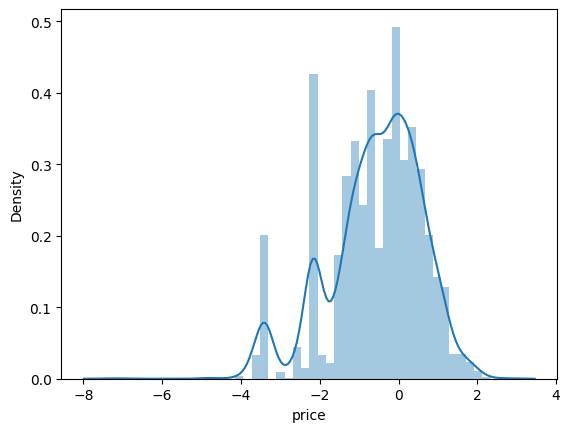

In [177]:
sns.distplot(np.log(df['price']))

# Class Balancing and Train, Test split

In [178]:
# define dataset
df = pd.read_csv('C:/Users/jack/Documents/EbayMarketScraping/Scraping_bs4_ebay-main/02-11-23_clean_output8719row.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove irrelevant columns
df.drop(['title', 'sold_date', 'link', 'seller notes', 'series', 'operating system', 'type', 'condition', 'processor', 'features', 'item number'], axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']

# Convert the 'price' variable to a binary variable
threshold = 50
y = np.where(y > threshold, 1, 0)

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

# Convert categorial variables with label encoder
# Create arrary of categorial variables to be encoded
categorical_cols = ['brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']
le = LabelEncoder()

# apply label encoder on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1, stratify=y_over)



Counter({1: 8574, 0: 141})
Counter({1: 8574, 0: 8574})


## Scaling Numerical Variables

In [179]:
# Scale the numerical variables
scaler = StandardScaler()
df[['price', 'processor speed', 'ram size', 'storage capacity', 'screen size', 'brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']] = scaler.fit_transform(df[['price', 'processor speed', 'ram size', 'storage capacity', 'screen size', 'brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']])
display(df.head())


,price,brand,processor i series,processor generation,processor speed,ram size,storage capacity,storage type,screen size,gpu,model
0,0.403432,-0.965045,1.442572,-1.832284,0.776639,0.928846,-0.290230,0.375474,1.218971,3.262962,0.203365
1,0.280141,-0.965045,1.442572,-1.832284,0.335617,0.928846,-0.290230,0.375474,1.218971,3.262962,0.203365
2,0.526724,-0.965045,1.442572,-0.799235,0.629632,0.928846,1.879399,0.375474,1.128821,4.082267,0.089677
3,0.937694,-0.965045,1.442572,-1.832284,0.923647,0.928846,1.879399,0.375474,2.751530,3.344892,0.212839
4,1.184276,-0.965045,1.442572,0.750338,0.482625,0.928846,-0.290230,-2.042150,1.218971,5.065434,0.146521


In [180]:
df.corr()['price']

price                   1.000000
brand                   0.011368
processor i series      0.403558
processor generation    0.600241
processor speed         0.316634
ram size                0.522596
storage capacity        0.485611
storage type            0.088106
screen size             0.063525
gpu                     0.276728
model                   0.067472
Name: price, dtype: float64

The `df.corr()['price']` command returns the correlation coefficients between the `price` variable and all other variables in the dataframe `df`. Here's an analysis of the correlation values:

- `price`: The correlation of `price` with itself is always 1, so this value is not informative.

- `brand`: The correlation between `brand` and `price` is negative and very weak, which suggests that there is little or no relationship between the brand of the device and its price.

- `processor i series`: The correlation between `processor i series` and `price` is positive and moderately strong, which suggests that devices with higher-end processors tend to have higher prices.

- `processor generation`: The correlation between `processor generation` and `price` is negative and moderately strong, which suggests that newer generations of processors tend to be associated with lower prices.

- `processor speed`: The correlation between `processor speed` and `price` is positive and very weak, which suggests that there is little or no relationship between the speed of the processor and the price of the device.

- `ram size`: The correlation between `ram size` and `price` is positive and moderately strong, which suggests that devices with more RAM tend to have higher prices.

- `storage capacity`: The correlation between `storage capacity` and `price` is positive and moderately strong, which suggests that devices with more storage capacity tend to have higher prices.

- `storage type`: The correlation between `storage type` and `price` is positive and weak, which suggests that there is little or no relationship between the type of storage and the price of the device.

- `screen size`: The correlation between `screen size` and `price` is positive and very weak, which suggests that there is little or no relationship between the size of the screen and the price of the device.

- `gpu`: The correlation between `gpu` and `price` is positive and weak, which suggests that devices with better graphics processing units tend to have slightly higher prices.

- `model`: The correlation between `model` and `price` is positive and weak, which suggests that there is little or no relationship between the specific model of the device and its price.

Overall, the strongest correlations with `price` are `processor i series`, `ram size`, and `storage capacity`, which suggests that these features are important predictors of device price. The weakest correlations are `brand`, `processor speed`, `storage type`, `screen size`, and `model`, which suggests that these features are less important predictors of device price. The `gpu` feature has a positive correlation with `price`, but the correlation is weak.

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8715 entries, 0 to 8718
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 8715 non-null   float64
 1   brand                 8715 non-null   float64
 2   processor i series    8715 non-null   float64
 3   processor generation  8715 non-null   float64
 4   processor speed       8715 non-null   float64
 5   ram size              8715 non-null   float64
 6   storage capacity      8715 non-null   float64
 7   storage type          8715 non-null   float64
 8   screen size           8715 non-null   float64
 9   gpu                   8715 non-null   float64
 10  model                 8715 non-null   float64
dtypes: float64(11)
memory usage: 817.0 KB


<Axes: >

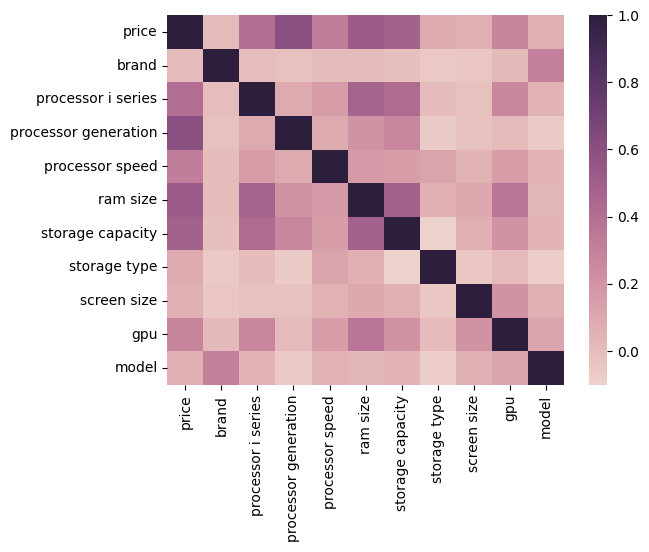

In [182]:
# Set the color scheme
cmap = sns.cubehelix_palette(as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap)

c:\Users\jack\Documents\EbayMarketScraping\Scraping_bs4_ebay-main\scraper\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jack\AppData\Local\Temp\ipykernel_4444\2721140454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


<Axes: xlabel='price', ylabel='Density'>

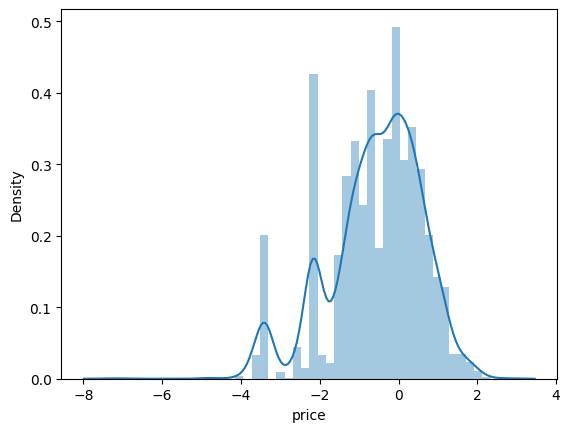

In [183]:
sns.distplot(np.log(df['price']))

# Training and evaluating multiple models

## Random Forest Classifier - Training on a Balanced dataset

In [184]:
# define dataset
df = pd.read_csv('C:/Users/jack/Documents/EbayMarketScraping/Scraping_bs4_ebay-main/02-11-23_clean_output8719row.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove irrelevant columns
df.drop(['title', 'sold_date', 'link', 'seller notes', 'series', 'operating system', 'type', 'condition', 'processor', 'features', 'item number'], axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables with label encoder
# Create array of categorical variables to be encoded
categorical_cols = ['brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']
le = LabelEncoder()

# Apply label encoder on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Convert all columns to float64
df = df.astype('float64')

# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']

# Convert the 'price' variable to a binary variable
threshold = 50
y = np.where(y > threshold, 1, 0)

# Scale the numerical variables
scaler = StandardScaler()

# List columns in the dataframe
cols = df.columns
df[cols] = scaler.fit_transform(df[cols])
display(df.head())

# Summarize class distribution
print(Counter(y))

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Summarize class distribution
print(Counter(y_over))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1, stratify=y_over)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5, class_weight='balanced')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))






,price,brand,processor i series,processor generation,processor speed,ram size,storage capacity,storage type,screen size,gpu,model
0,0.403432,-0.965045,1.442572,-1.832284,0.776639,0.928846,-0.290230,0.375474,1.218971,3.262962,0.203365
1,0.280141,-0.965045,1.442572,-1.832284,0.335617,0.928846,-0.290230,0.375474,1.218971,3.262962,0.203365
2,0.526724,-0.965045,1.442572,-0.799235,0.629632,0.928846,1.879399,0.375474,1.128821,4.082267,0.089677
3,0.937694,-0.965045,1.442572,-1.832284,0.923647,0.928846,1.879399,0.375474,2.751530,3.344892,0.212839
4,1.184276,-0.965045,1.442572,0.750338,0.482625,0.928846,-0.290230,-2.042150,1.218971,5.065434,0.146521


Counter({1: 8574, 0: 141})
Counter({1: 8574, 0: 8574})
Accuracy: 0.9644314868804664
Confusion Matrix:
[[1680   35]
 [  87 1628]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1715
           1       0.98      0.95      0.96      1715

    accuracy                           0.96      3430
   macro avg       0.96      0.96      0.96      3430
weighted avg       0.96      0.96      0.96      3430



## Random Forest Regressor - Training on an Imbalanced dataset

In [185]:
from sklearn.ensemble import RandomForestRegressor

# define dataset
df = pd.read_csv('C:/Users/jack/Documents/EbayMarketScraping/Scraping_bs4_ebay-main/02-11-23_clean_output8719row.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove irrelevant columns
df.drop(['title', 'sold_date', 'link', 'seller notes', 'series', 'operating system', 'type', 'condition', 'processor', 'features', 'item number'], axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables with label encoder
# Create array of categorical variables to be encoded
categorical_cols = ['brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']
le = LabelEncoder()

# Apply label encoder on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Convert all columns to float64
df = df.astype('float64')



# Scale the numerical variables
scaler = StandardScaler()

# List columns in the dataframe
cols = df.columns
df[cols] = scaler.fit_transform(df[cols])
display(df.head())

# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']

# Summarize class distribution
print(Counter(y))


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
reg = RandomForestRegressor(random_state=42)

# Train the regressor
reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2 score: {r2}')

# Add the results to the dataframe
results = {'Model': 'Random Forest Regressor',
           'MSE': mse,
           'RMSE': rmse,
           'R^2': r2}


# Create a dataframe from the dictionary
output = pd.DataFrame([results])
print(output.head())

,price,brand,processor i series,processor generation,processor speed,ram size,storage capacity,storage type,screen size,gpu,model
0,0.403432,-0.965045,1.442572,-1.832284,0.776639,0.928846,-0.290230,0.375474,1.218971,3.262962,0.203365
1,0.280141,-0.965045,1.442572,-1.832284,0.335617,0.928846,-0.290230,0.375474,1.218971,3.262962,0.203365
2,0.526724,-0.965045,1.442572,-0.799235,0.629632,0.928846,1.879399,0.375474,1.128821,4.082267,0.089677
3,0.937694,-0.965045,1.442572,-1.832284,0.923647,0.928846,1.879399,0.375474,2.751530,3.344892,0.212839
4,1.184276,-0.965045,1.442572,0.750338,0.482625,0.928846,-0.290230,-2.042150,1.218971,5.065434,0.146521


Counter({-0.2130234759977515: 218, -0.37741170798669066: 217, -0.6239940559700995: 200, -0.5417999399756299: 198, -0.45960582398116023: 197, -0.7061881719645691: 193, -0.8705764039535082: 177, 0.1157529879801268: 162, 0.28014121996906594: 159, -0.2952175919922211: 159, 0.5267235679524747: 147, -0.5007028819783951: 143, 0.3623353359635355: 140, -0.13082936000328194: 130, -0.04863524400881235: 130, 0.9376941479248225: 126, -0.5828969979728646: 125, -0.9116734619507431: 114, -0.7883822879590386: 112, -0.41850876598392545: 104, 0.033558871985657227: 103, -0.9527705199479778: 103, -0.3855489254701432: 103, -0.8294793459562735: 100, -0.7061059778485745: 87, 0.4445294519580051: 83, -0.7472852299618039: 80, 1.3486647278971704: 79, 0.6089176839469442: 77, -0.7143253894480215: 74, -0.6650911139673343: 73, -1.0349646359424474: 69, 0.1979471039745964: 68, -0.08973230200604713: 68, -0.9115912678347485: 66, -0.33631464998945587: 60, 0.7733059159358834: 59, 1.7596353078695184: 58, -0.9937853838292181

## Random Forest Regressor - Training on an Balanced dataset

In [187]:
from sklearn.ensemble import RandomForestRegressor

# define dataset
df = pd.read_csv('C:/Users/jack/Documents/EbayMarketScraping/Scraping_bs4_ebay-main/02-11-23_clean_output8719row.csv')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove irrelevant columns
df.drop(['title', 'sold_date', 'link', 'seller notes', 'series', 'operating system', 'type', 'condition', 'processor', 'features', 'item number'], axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']

# Convert the 'price' variable to a binary variable
threshold = 50
y = np.where(y > threshold, 1, 0)

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))


# Convert categorial variables with label encoder
categorical_cols = ['brand', 'processor i series', 'processor generation', 'storage type','gpu', 'model']
le = LabelEncoder()

# apply label encoder on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=1, stratify=y_over)

# Create a random forest regressor
reg = RandomForestRegressor(random_state=42)

# Train the regressor
reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2 score: {r2}')

# Add the results to the dataframe
results = {'Model': 'Random Forest Regressor',
           'MSE': mse,
           'RMSE': rmse,
           'R^2': r2}


# Create a dataframe from the dictionary
output = pd.DataFrame([results])
print(output.head())

Counter({1: 8574, 0: 141})
Counter({1: 8574, 0: 8574})
MSE: 0.003991254879171557
RMSE: 0.06317637912362149
R^2 score: 0.9840349804833137
                     Model       MSE      RMSE       R^2
0  Random Forest Regressor  0.003991  0.063176  0.984035
